# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [49]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite, Joint, MakePoissonPmf, MakeNormalPmf, MakeMixture, EvalWeibullCdf, EvalWeibullPdf, MakeBinomialPmf

from scipy.stats import lognorm

import numpy as np

import thinkplot

import itertools

from math import exp,sqrt

In [12]:
class Weight(Suite, Joint):
    def Likelihood(self, data, hypo):
        mu,sigma = hypo
        return lognorm.pdf(x,sigma,scale=exp(mu))

In [11]:
lognorm.pdf(1,1,scale=exp(1))

0.24197072451914337

0.42118061206317287


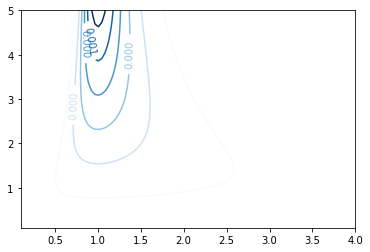

<Figure size 432x576 with 0 Axes>

In [54]:
class LightBulb(Suite,Joint):
    def Likelihood(self,data,hypo):
        lam,k = hypo
        return EvalWeibullPdf(data,lam,k)
    
suite = LightBulb(itertools.product(np.linspace(.1,4,100),np.linspace(.1,5,100)));

suite.Update(1)

thinkplot.Contour(suite)
thinkplot.figure()
x=0
for hypo,p in suite.Items():
    lam,k = hypo
    x += p*EvalWeibullCdf(1,lam,k)
    
print(x)

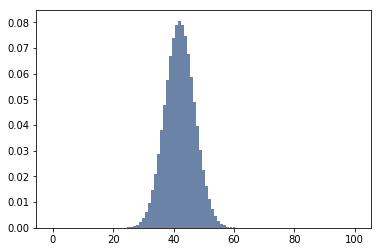

In [56]:
dist = MakeBinomialPmf(100,x);
thinkplot.hist(dist)